In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	20
float64		column 3	6
float64		column 4	2
float64		column 5	0
float64		column 6	6
float64		column 7	8
float64		column 8	6
float64		column 9	2
float64		column 10	4
float64		column 11	6
float64		column 12	8


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,796.000000,780.000000,794.000000,798.000000,800.000000,794.000000,792.000000,794.000000,798.000000,796.000000,794.000000,792.000000
mean,1.512822,1.259093,1.980956,1.933443,1.989836,2.006947,1.955642,1.997865,1.995887,1.986840,1.960789,1.962139
std,2.750110,3.640225,1.144330,1.165866,1.169867,1.141413,1.170188,1.136174,1.144476,1.154667,1.182509,1.128505
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.426255,-0.961645,1.021200,0.927600,0.976290,0.990855,0.944333,0.975108,1.057975,1.026400,0.900498,0.978812
50%,1.045130,0.564195,1.968150,1.902350,2.027350,2.009300,1.948000,2.006050,1.980000,2.000450,1.947500,1.949150
75%,3.973350,4.494825,2.923125,2.937800,2.999200,3.015300,2.984625,2.927875,3.005175,2.991525,3.033800,2.873700
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

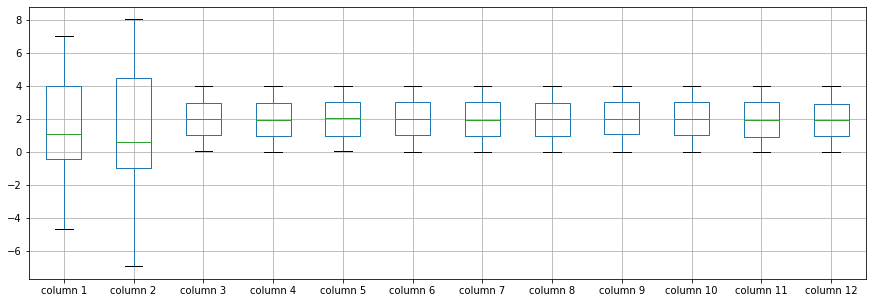

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.512822
column 2     1.259093
column 3     1.980956
column 4     1.933443
column 5     1.989836
column 6     2.006947
column 7     1.955642
column 8     1.997865
column 9     1.995887
column 10    1.986840
column 11    1.960789
column 12    1.962139
dtype: float64

In [6]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.432246,-0.023233,0.005548,0.037681,0.045774,-0.002106,0.014904,-0.003747,-0.000777,0.025113,0.022493
column 2,-0.432246,1.000000,-0.011642,-0.025085,-0.020372,-0.001737,0.032453,-0.015025,-0.000408,-0.045853,-0.082975,0.029093
column 3,-0.023233,-0.011642,1.000000,-0.037123,0.081730,-0.004670,0.024375,-0.003812,-0.001747,-0.008751,-0.041979,0.004467
column 4,0.005548,-0.025085,-0.037123,1.000000,0.004786,-0.033386,0.035685,0.040752,-0.026219,0.042051,0.039151,-0.014913
column 5,0.037681,-0.020372,0.081730,0.004786,1.000000,0.046343,0.018164,0.008595,-0.012434,-0.010001,-0.003739,0.007364
column 6,0.045774,-0.001737,-0.004670,-0.033386,0.046343,1.000000,-0.072115,0.037410,0.022027,0.001465,-0.038057,-0.003958
column 7,-0.002106,0.032453,0.024375,0.035685,0.018164,-0.072115,1.000000,-0.046462,-0.008978,-0.046936,-0.012129,-0.005963
column 8,0.014904,-0.015025,-0.003812,0.040752,0.008595,0.037410,-0.046462,1.000000,-0.058125,-0.054926,-0.001940,-0.046514
column 9,-0.003747,-0.000408,-0.001747,-0.026219,-0.012434,0.022027,-0.008978,-0.058125,1.000000,0.043940,-0.015269,-0.023985
column 10,-0.000777,-0.045853,-0.008751,0.042051,-0.010001,0.001465,-0.046936,-0.054926,0.043940,1.000000,-0.074834,0.049201


In [7]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [8]:
imputer = md.Midas(layer_structure = [12,12+70,12+70+70,12+70+70,12+70+70+70+70,12+70+70+70,12+70+70,12+70,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.3443883895874
Epoch: 1 , loss: 29.059182510375976
Epoch: 2 , loss: 27.629634399414062
Epoch: 3 , loss: 24.103833274841307
Epoch: 4 , loss: 23.109338417053223
Epoch: 5 , loss: 22.628031272888183
Epoch: 6 , loss: 22.190605545043944
Epoch: 7 , loss: 21.90681163787842
Epoch: 8 , loss: 21.5271236038208
Epoch: 9 , loss: 21.075988159179687
Epoch: 10 , loss: 20.90971408843994
Epoch: 11 , loss: 20.794562187194824
Epoch: 12 , loss: 20.654996910095214
Epoch: 13 , loss: 20.623767700195312
Epoch: 14 , loss: 20.278459587097167
Epoch: 15 , loss: 20.045912666320802
Epoch: 16 , loss: 20.189375648498537
Epoch: 17 , loss: 20.14344177246094
Epoch: 18 , loss: 19.939468803405763
Epoch: 19 , loss: 19.909361572265624
Epoch: 20 , loss: 19.881043701171876
Epoch: 21 , loss: 19.79171848297119
Epoch: 22 , loss: 19.756645011901856
Epoch: 23 , loss: 19.799144096374512
Epoch: 24 , loss: 19.750794830322267
Epoch: 25 , loss: 19.6470

In [9]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [10]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [11]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [12]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [13]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [14]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [15]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(19.605258118183254, 248.22200824735242)

In [16]:
NRMS=numerator/denominator
NRMS


0.0789827552222794

In [17]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [18]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [19]:
imputations[-1].to_excel("4-gauss_AL_5(imp).xlsx", index=False, header=False)